In [15]:
import numpy as np
import matplotlib.pyplot as plt


In [16]:
def prediction(theta_0, theta_1, x):
    """주어진 학습 데이터 벡터 x에 대해서 모든 예측 값을 벡터로 리턴하는 함수"""
    # 지난 과제 코드를 갖고 오세요
    return theta_0  + theta_1 *x
    
def prediction_difference(theta_0, theta_1, x, y):
    """모든 예측 값들과 목표 변수들의 오차를 벡터로 리턴해주는 함수"""
    # 지난 과제 코드를 갖고 오세요
    return prediction(theta_0, theta_1, x) - y

In [32]:
def gradient_descent(theta_0, theta_1, x, y, iterations, alpha):
    """주어진 theta_0, theta_1 변수들을 경사 하강를 하면서 업데이트 해주는 함수"""
    cost_list = []
    for i in range(iterations):  # 정해진 번만큼 경사 하강을 한다
        m = len(x)
        
        
        error = prediction_difference(theta_0, theta_1, x, y)  # 예측값들과 입력 변수들의 오차를 계산
        cost = (error@error)/(m*2)
        cost_list.append(cost)
        # 코드를 쓰세요
        theta_0 = theta_0 - alpha * error.mean()
        theta_1 = theta_1 - alpha * (error * x).mean()
       
        if i%10 == 0:
            plt.scatter(house_size, house_price)
            plt.plot(house_size, prediction(theta_0, theta_1,x), color = 'red')
            plt.show()
        
    return theta_0, theta_1, cost_list

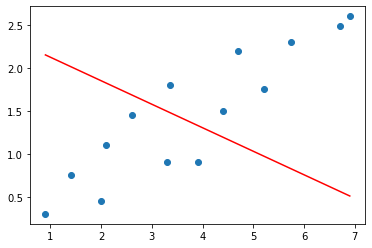

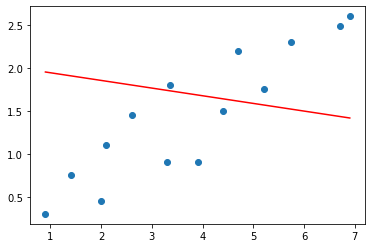

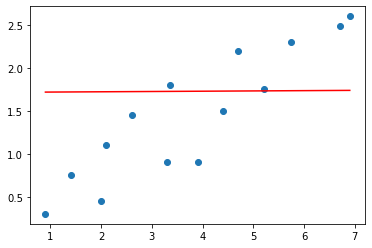

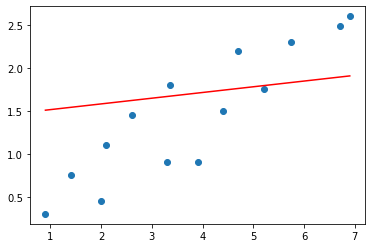

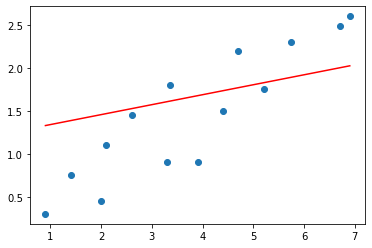

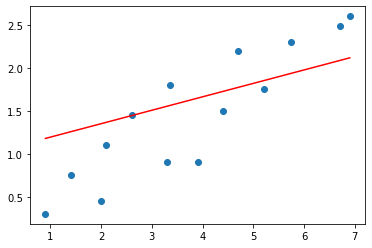

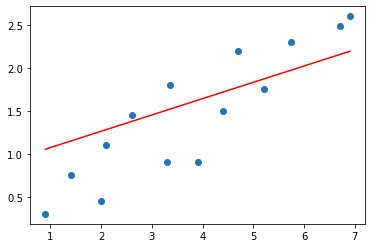

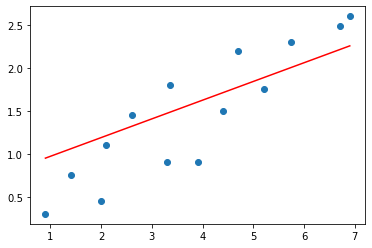

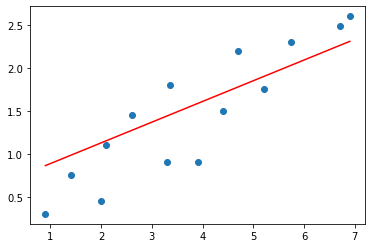

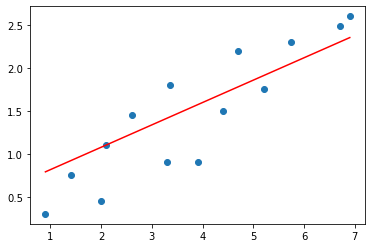

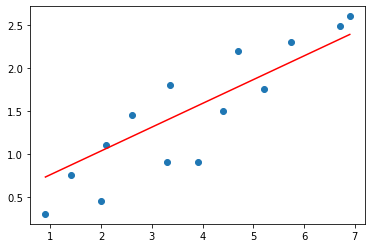

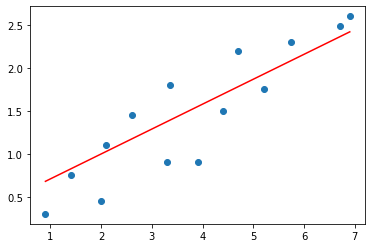

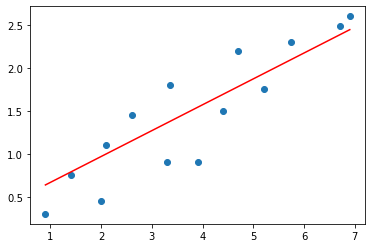

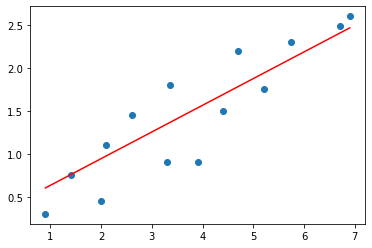

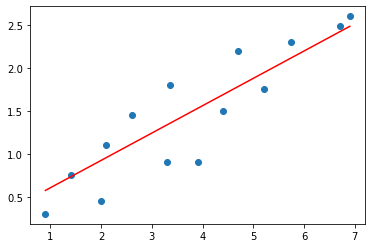

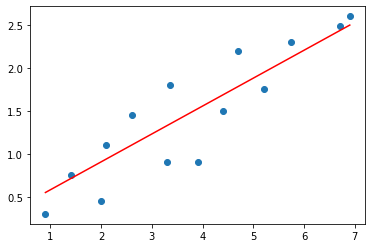

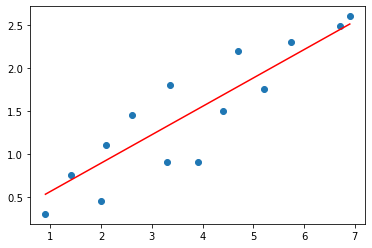

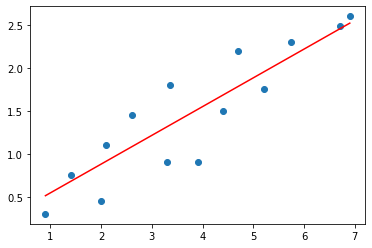

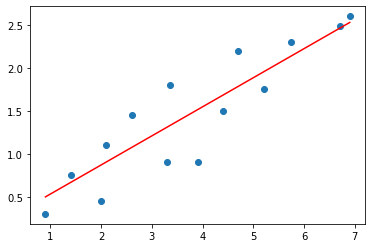

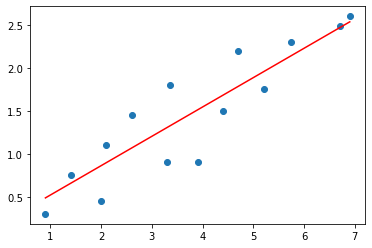

(0.16821801417752186, 0.3438032402351199)

In [33]:
# 입력 변수(집 크기) 초기화 (모든 집 평수 데이터를 1/10 크기로 줄임)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])

# 목표 변수(집 가격) 초기화 (모든 집 값 데이터를 1/10 크기로 줄임)
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

# theta 값들 초기화 (아무 값이나 시작함)
theta_0 = 2.5
theta_1 = 0

# 학습률 0.1로 200번 경사 하강
theta_0, theta_1,cost_list = gradient_descent(theta_0, theta_1, house_size, house_price, 200, 0.1)

theta_0, theta_1

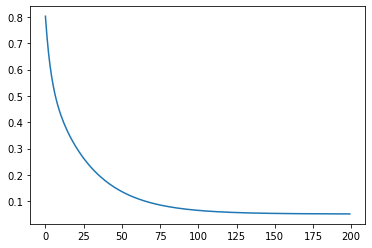

In [34]:
plt.plot(cost_list)

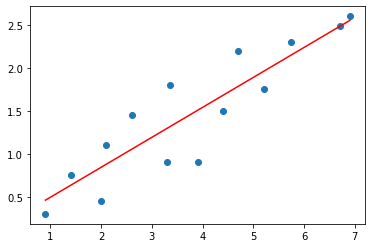

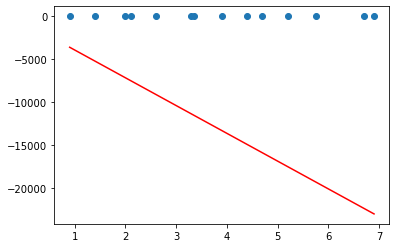

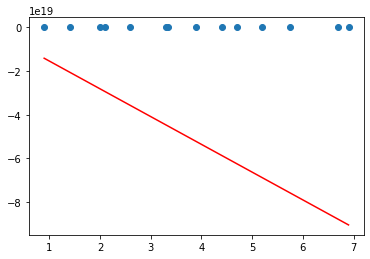

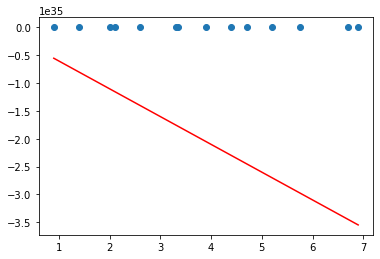

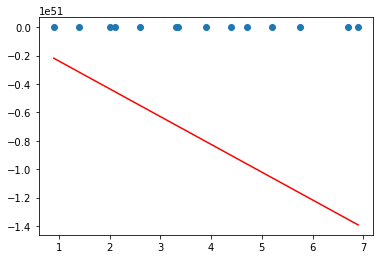

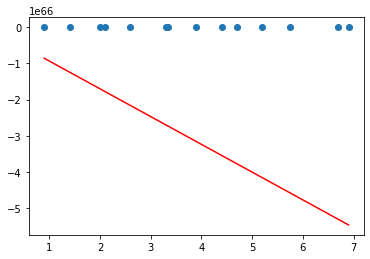

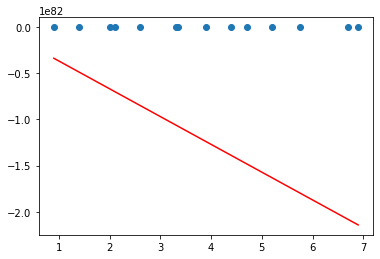

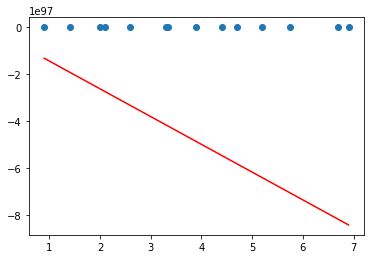

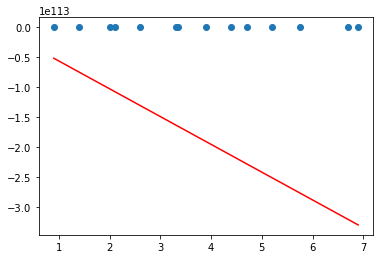

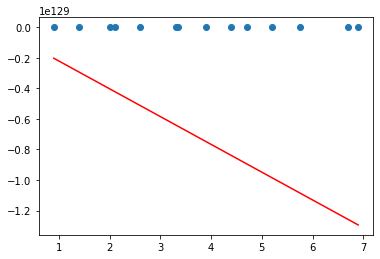

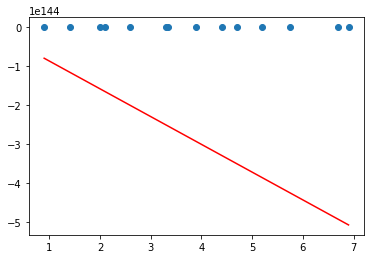

<ipython-input-32-e42b13bed264>:9: RuntimeWarning: overflow encountered in matmul
  cost = (error@error)/(m*2)


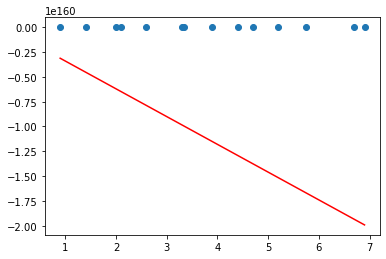

<ipython-input-32-e42b13bed264>:9: RuntimeWarning: overflow encountered in matmul
  cost = (error@error)/(m*2)


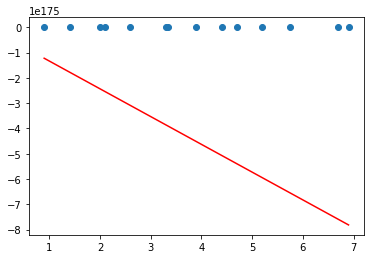

<ipython-input-32-e42b13bed264>:9: RuntimeWarning: overflow encountered in matmul
  cost = (error@error)/(m*2)


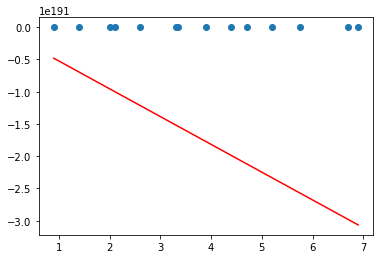

<ipython-input-32-e42b13bed264>:9: RuntimeWarning: overflow encountered in matmul
  cost = (error@error)/(m*2)


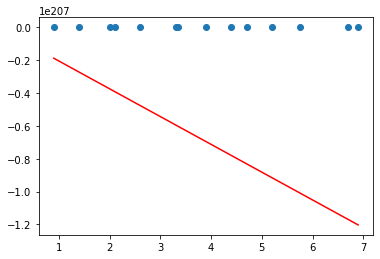

<ipython-input-32-e42b13bed264>:9: RuntimeWarning: overflow encountered in matmul
  cost = (error@error)/(m*2)


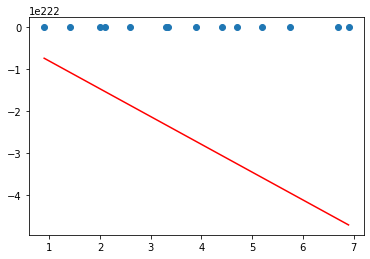

<ipython-input-32-e42b13bed264>:9: RuntimeWarning: overflow encountered in matmul
  cost = (error@error)/(m*2)


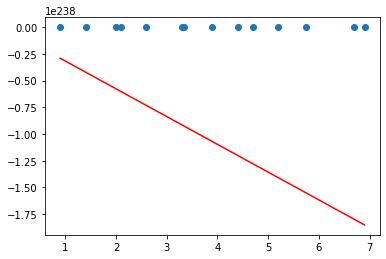

<ipython-input-32-e42b13bed264>:9: RuntimeWarning: overflow encountered in matmul
  cost = (error@error)/(m*2)


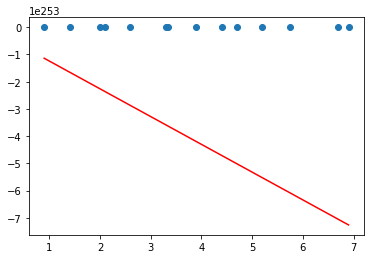

<ipython-input-32-e42b13bed264>:9: RuntimeWarning: overflow encountered in matmul
  cost = (error@error)/(m*2)


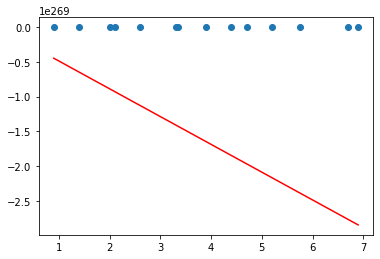

<ipython-input-32-e42b13bed264>:9: RuntimeWarning: overflow encountered in matmul
  cost = (error@error)/(m*2)


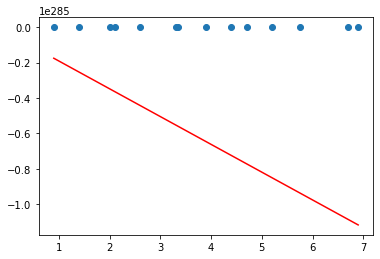

<ipython-input-32-e42b13bed264>:9: RuntimeWarning: overflow encountered in matmul
  cost = (error@error)/(m*2)


In [36]:
theta_0, theta_1,cost_list = gradient_descent(theta_0, theta_1, house_size, house_price, 200, 2)

# Scikit-learn

In [67]:
from sklearn.datasets import load_boston #sklearn에 기본으로 들어있는 dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [39]:
boston_dataset = load_boston()

In [41]:
print(boston_dataset.DESCR) #DESCR: description

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [42]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [43]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [44]:
boston_dataset.data.shape

(506, 13)

In [45]:
boston_dataset.target #집값, target만 나열

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [46]:
boston_dataset.target.shape

(506,)

In [48]:
x = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [49]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [50]:
x[['AGE']]

,AGE
0,65.2
1,78.9
2,61.1
3,45.8
4,54.2
...,...
501,69.1
502,76.7
503,91.0
504,89.3


In [52]:
x = x[['AGE']]
x #입력변수 하나만 받아오기

,AGE
0,65.2
1,78.9
2,61.1
3,45.8
4,54.2
...,...
501,69.1
502,76.7
503,91.0
504,89.3


In [53]:
y = pd.DataFrame(boston_dataset.target, columns = ['MEDV'])

In [54]:
y # output variable

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [56]:
#test_size:: 0.2 (20%)를 test_set으로 사용하겟다는 의미
#random_state ; optional; 정수값을 넘겨주면 매번 똑같은 data로 train
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 5)

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [59]:
model = LinearRegression()

In [60]:
model.fit(x_train, y_train)

LinearRegression()

In [63]:
#theta_1 값
model.coef_

array([[-0.12402883]])

In [64]:
#theta_0값
model.intercept_

array([31.04617413])

In [65]:
#최적선: f(x) =  31.04617413 -0.12402883x 

In [66]:
#test_Set으로 평가
y_test_prediction = model.predict(x_test)
y_test_prediction

array([[20.31768041],
       [28.14389953],
       [22.84786852],
       [18.64329122],
       [24.62148078],
       [19.99520545],
       [19.75955068],
       [22.79825699],
       [20.92542167],
       [21.74401194],
       [23.29437231],
       [25.41526529],
       [21.53316293],
       [25.94858925],
       [23.76568186],
       [24.55946636],
       [18.64329122],
       [18.64329122],
       [22.00447248],
       [18.64329122],
       [18.89134887],
       [18.90375176],
       [21.33471681],
       [22.71143681],
       [28.46637448],
       [19.06498923],
       [24.31140871],
       [22.05408402],
       [26.32067574],
       [26.59353916],
       [19.0153777 ],
       [18.85414022],
       [19.30064401],
       [18.7301114 ],
       [28.76404367],
       [18.92855752],
       [21.5579687 ],
       [19.21382383],
       [19.69753626],
       [29.08651863],
       [19.56110455],
       [18.64329122],
       [21.02464473],
       [20.14404005],
       [24.72070384],
       [25

In [69]:
#RMSE
mean_squared_error(y_test, y_test_prediction)**0.5

8.236881612652455